In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2


In [2]:
import pickle
from pathlib import Path


# DATE = "20220124_084114"
# DATE = "20220124_205957"
# DATE = "20220125_153127"
DATE = "20220219_212026"


# Load the training list
training_list = []
with open("./simulations_data/prepare_lstm/{:s}/training/training_list.pkl".format(DATE), "rb") as f:
    training_list = pickle.load(f)
print("{:d} training objects loaded.".format(len(training_list)))


num_epoch = training_list[0].training_progress_dict["training_loss_array"].shape[0]
print("num_epoch: {:d}".format(num_epoch))
for training in training_list:
    print("{:s}, learning_rate: {:f}, validation accuracy: {:.2f}%".format(training.label, training.learning_rate, training.training_progress_dict["validation_accuracy_array"][-1] * 100))


3 training objects loaded.
num_epoch: 100
LSTM 1, learning_rate: 0.001000, validation accuracy: 27.12%
LSTM 2, learning_rate: 0.000100, validation accuracy: 21.52%
Bi-LSTM, learning_rate: 0.000100, validation accuracy: 21.52%


In [3]:
from pathlib import Path

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


def plot():
    FIG_SIZE = (16, 9)
    DPI = 120
    GRID = True
    FONT_SIZE = 24
    FONT_SIZE_TICK = 24.0
    FONT_WEIGHT = "normal"
    FONT_SIZE_LEGEND = 18
    LINE_WIDTH = 4.0
    COLOR_LIST = [ "#0077BB", "#009988", "#EE7733", "#EE3377", "#999999", "#33BBEE" ]
    MARKER_LIST = [ 's', 'o', 'v', '*', 'D', 'x' ]
    MARKER_SIZE = 14.0
    MARK_EVERY = 10
    
    FIGURE_DIRECTORY = "./simulations_data/prepare_lstm/{:s}/figures/".format(DATE)
    Path(FIGURE_DIRECTORY).mkdir(parents=True, exist_ok=True)
    
    
    n_epoch_array = np.array(range(1, num_epoch + 1))
    
    
    ################################################################################
    # Beginning of training loss plotting
    
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    for training_index, training in enumerate(training_list):
        ax.plot(
            n_epoch_array,
            training.training_progress_dict["training_loss_array"],
            label=training.label,
            linestyle='-',
            linewidth=LINE_WIDTH,
            color=COLOR_LIST[training_index],
            marker=MARKER_LIST[training_index],
            markersize=MARKER_SIZE,
            markevery=MARK_EVERY)
    ax.legend(shadow=True, fontsize=FONT_SIZE_LEGEND)
    ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Training Loss', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.grid(GRID)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    
    # Save the plotting
    fig.savefig(FIGURE_DIRECTORY + 'fig_training_loss.pdf', format='pdf', bbox_inches='tight')
    fig.savefig(FIGURE_DIRECTORY + 'fig_training_loss.png'.format(DATE), format='png', bbox_inches='tight')
    
    # Ending of training loss plotting
    ################################################################################
    
    
    ################################################################################
    # Beginning of training accuracy plotting
    
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    for training_index, training in enumerate(training_list):
        ax.plot(
            n_epoch_array,
            training.training_progress_dict["training_accuracy_array"],
            label=training.label,
            linestyle='-',
            linewidth=LINE_WIDTH,
            color=COLOR_LIST[training_index],
            marker=MARKER_LIST[training_index],
            markersize=MARKER_SIZE,
            markevery=MARK_EVERY)
    ax.legend(shadow=True, fontsize=FONT_SIZE_LEGEND)
    ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Training Accuracy', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.grid(GRID)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    
    # Save the plotting
    fig.savefig(FIGURE_DIRECTORY + 'fig_training_accuracy.pdf'.format(DATE), format='pdf', bbox_inches='tight')
    fig.savefig(FIGURE_DIRECTORY + 'fig_training_accuracy.png'.format(DATE), format='png', bbox_inches='tight')
    
    # Ending of training accuracy plotting
    ################################################################################
    
    
    ################################################################################
    # Beginning of validation loss plotting
    
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    for training_index, training in enumerate(training_list):
        ax.plot(
            n_epoch_array,
            training.training_progress_dict["validation_loss_array"],
            label=training.label,
            linestyle='-',
            linewidth=LINE_WIDTH,
            color=COLOR_LIST[training_index],
            marker=MARKER_LIST[training_index],
            markersize=MARKER_SIZE,
            markevery=MARK_EVERY)
    ax.legend(shadow=True, fontsize=FONT_SIZE_LEGEND)
    ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Validation Loss', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.grid(GRID)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    
    # Save the plotting
    fig.savefig(FIGURE_DIRECTORY + 'fig_validation_loss.pdf'.format(DATE), format='pdf', bbox_inches='tight')
    fig.savefig(FIGURE_DIRECTORY + 'fig_validation_loss.png'.format(DATE), format='png', bbox_inches='tight')
    
    # Ending of validation loss plotting
    ################################################################################
    
    
    ################################################################################
    # Beginning of validation accuracy plotting
    
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    for training_index, training in enumerate(training_list):
        ax.plot(
            n_epoch_array,
            training.training_progress_dict["validation_accuracy_array"],
            label=training.label,
            linestyle='-',
            linewidth=LINE_WIDTH,
            color=COLOR_LIST[training_index],
            marker=MARKER_LIST[training_index],
            markersize=MARKER_SIZE,
            markevery=MARK_EVERY)
    ax.legend(shadow=True, fontsize=FONT_SIZE_LEGEND)
    ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Validation Accuracy', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.grid(GRID)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    
    # Save the plotting
    fig.savefig(FIGURE_DIRECTORY + 'fig_validation_accuracy.pdf'.format(DATE), format='pdf', bbox_inches='tight')
    fig.savefig(FIGURE_DIRECTORY + 'fig_validation_accuracy.png'.format(DATE), format='png', bbox_inches='tight')
    
    # Ending of validation accuracy plotting
    ################################################################################


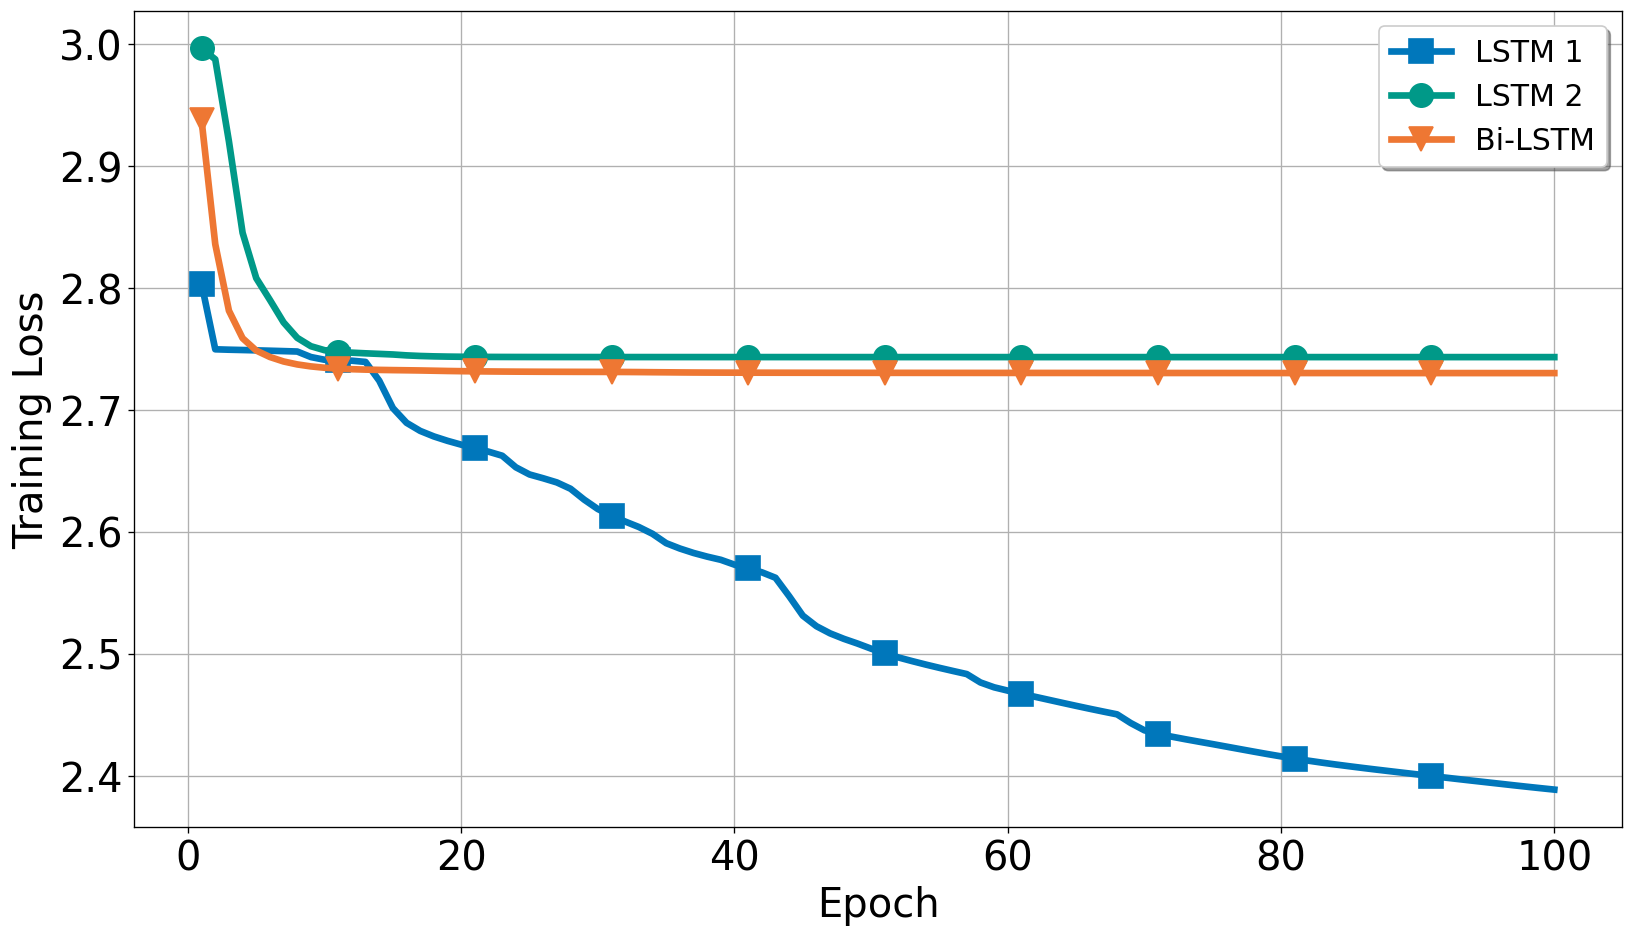

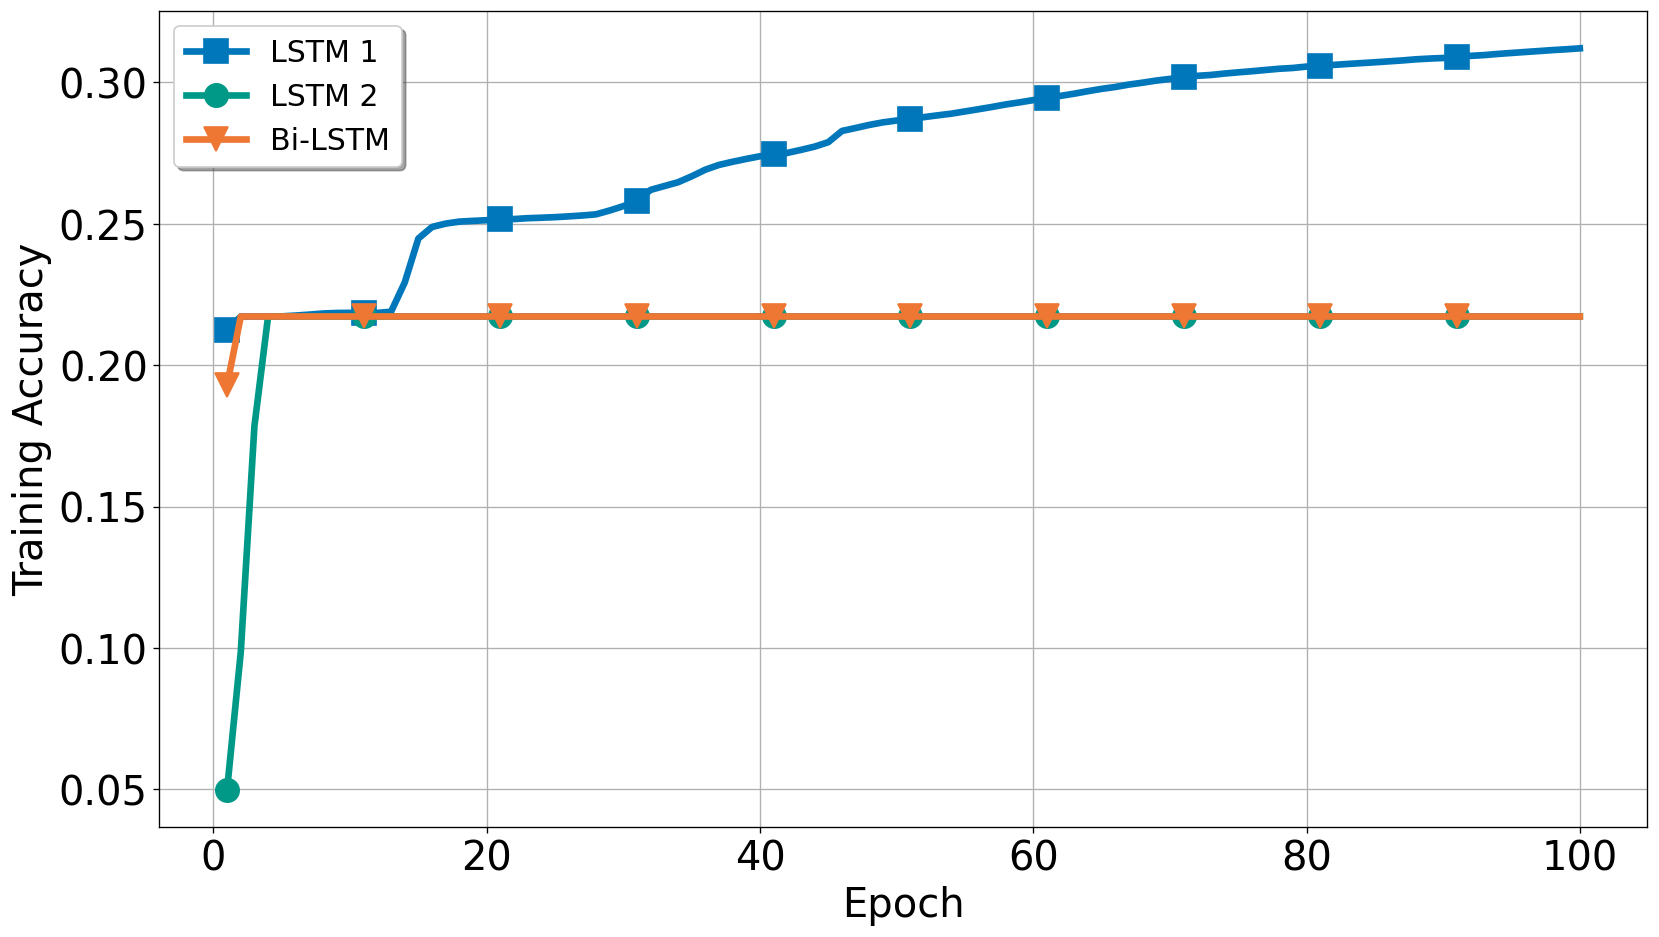

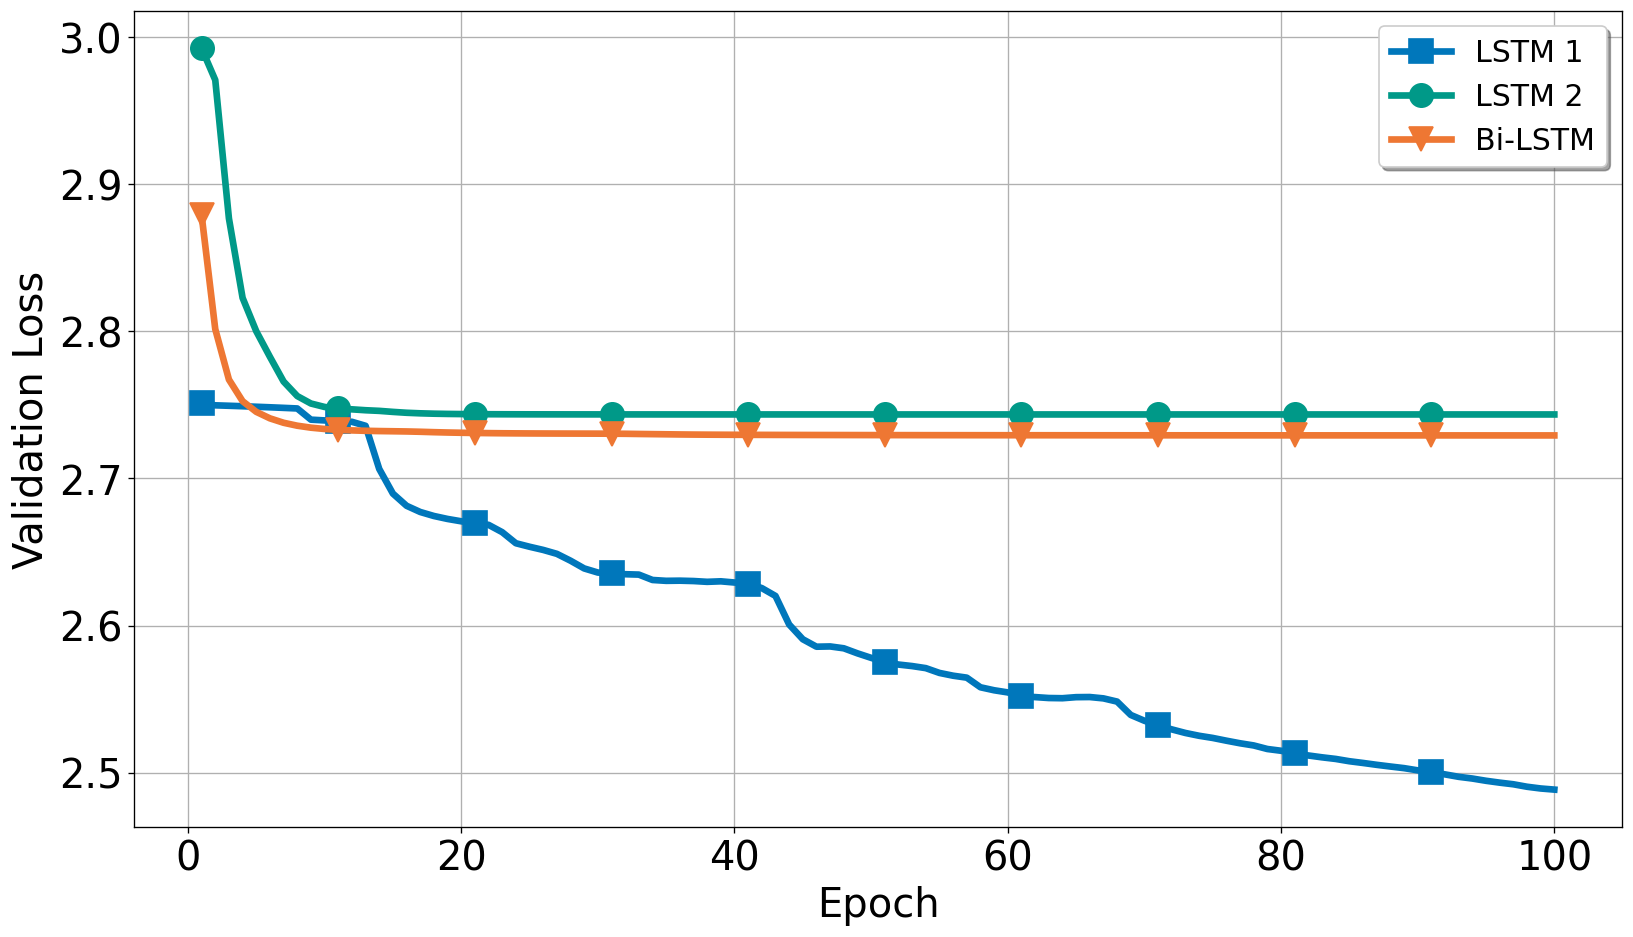

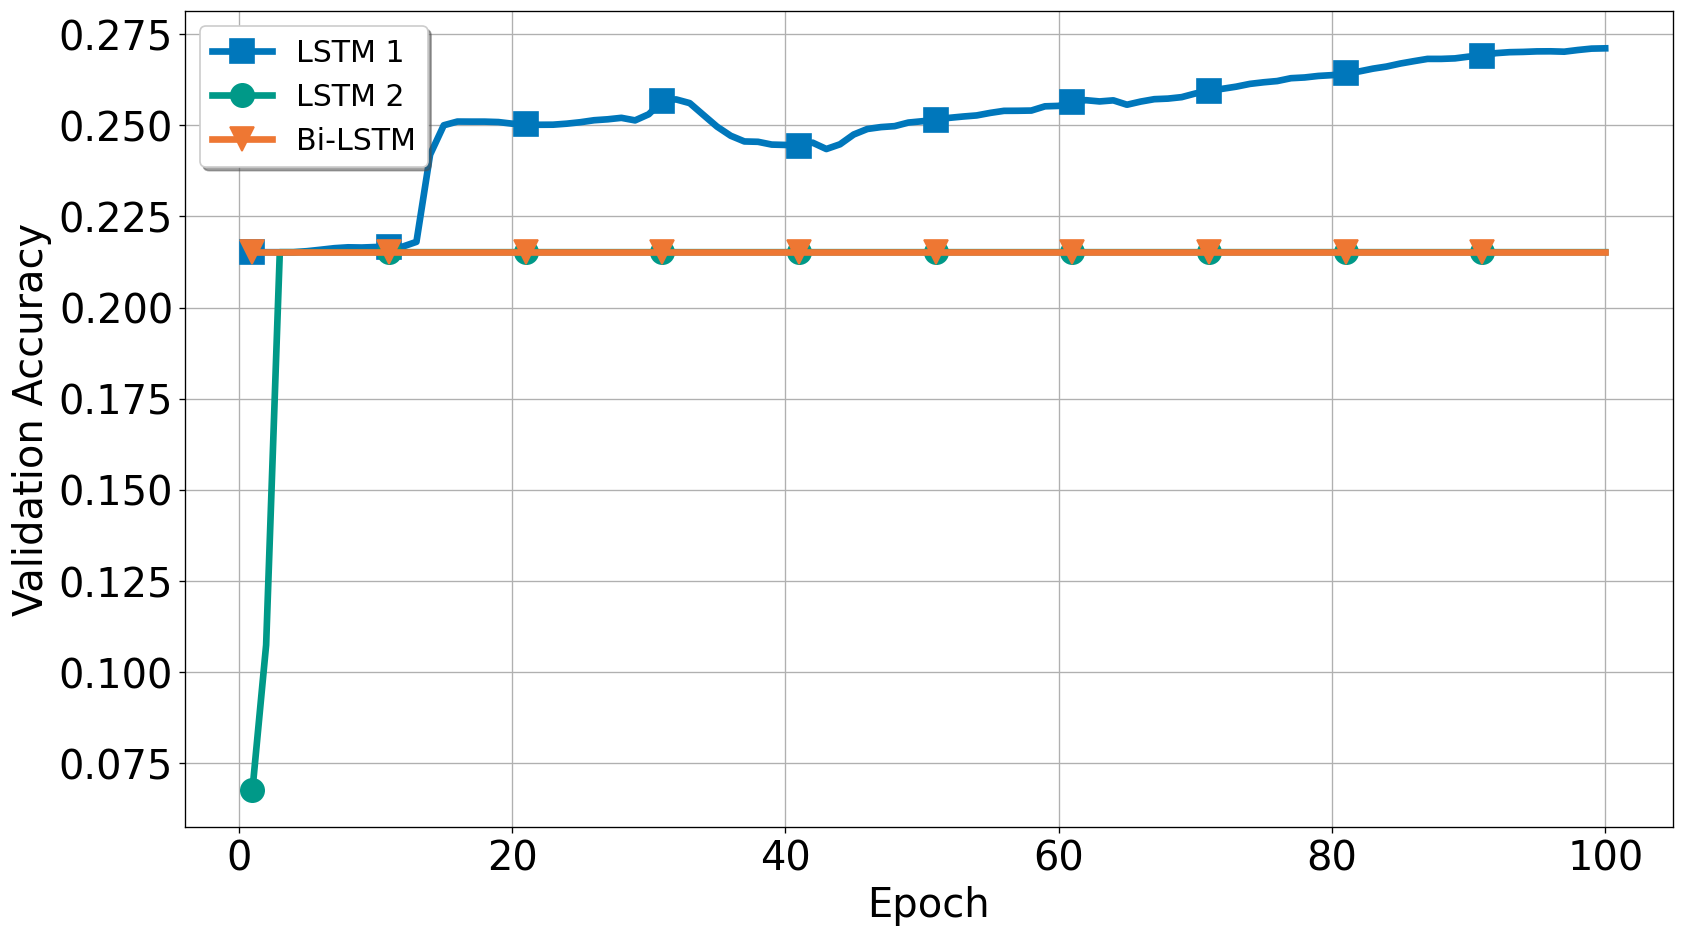

In [4]:
plot()
